In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Use Inspector to get columns
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Print column names/types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

start_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", start_date)

Query Date:  2016-08-23


In [22]:
# Perform a query to retrieve the data and precipitation scores

precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= "2016-08-23")\
.filter(Measurement.date <="2017-08-23").all()


In [15]:
# Save the query results as a Pandas DataFrame 
precip_df = pd.DataFrame(precip, columns= ["date", "precipitation"])

In [16]:
# Set the index to the date column
precip_df = precip_df.set_index("date")

In [17]:
# Sort the dataframe by date
precip_df = precip_df.sort_values("date").dropna()

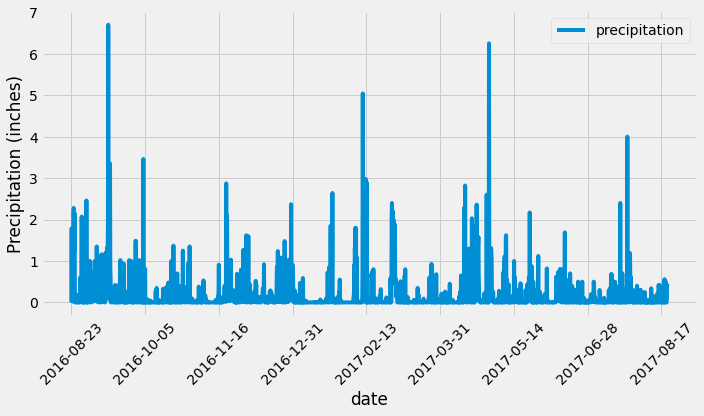

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(rot = 45, figsize = (10, 6))
plt.ylabel('Precipitation (inches)')
plt.tight_layout()
plt.legend(loc= 'upper right')
plt.savefig("Images/Precipitation.png")


In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station).count()
total_stations

9

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.id).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
busiest_station = 'USC00519281'
busiest_low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == busiest_station).all()
busiest_high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == busiest_station).all()
busiest_avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == busiest_station).all()
print(f"The lowest temperature was {busiest_low_temp}")
print(f"The highest temperature was {busiest_high_temp}")
print(f"The average temperature was {busiest_avg_temp}")

The lowest temperature was [(54.0,)]
The highest temperature was [(85.0,)]
The average temperature was [(71.66378066378067,)]


In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
busiest_station_data = session.query(Measurement.date, Measurement.tobs)\
.filter(Measurement.station == busiest_station)\
.filter(Measurement.date >= start_date ).all()





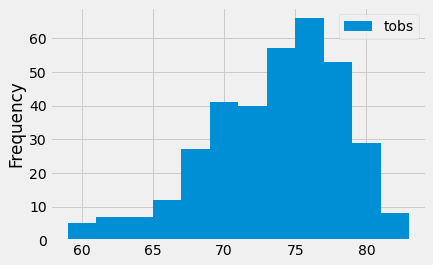

In [39]:
busiest_station_data_df = pd.DataFrame(busiest_station_data)
busiest_station_data_df.plot(kind='hist', bins=12)
plt.savefig("Images/Histogram")

# Close session

In [40]:
# Close Session
session.close()